In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline

### NIS plot when std_a_ = 30; std_yawdd_ = 30

In [2]:
def plot_NIS(logpath):
    NIS = []
    with open(logpath, "r") as infile:
        for line in infile:
            m = re.match("^NIS:(.*)", line)
            if m:
                #print(line.rstrip())
                NIS.append(float(m.group(1).rstrip()))
    pd.Series(NIS).fillna(0).plot(ylim=(0,20))
    plt.axhline(y=5.99, color='r')
    
    print("% of points over chi-square", sum(pd.Series(NIS) > 6)/pd.Series(NIS).count())

% of points over chi-square 0.0321285140562


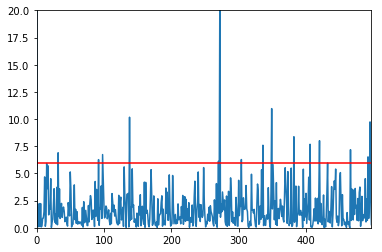

In [3]:
plot_NIS("./acc_30_yawacc_30.log")

### Longitudinal acceleration noise selection

In [4]:
# read in lidar data into dataframe
df_Lidar = pd.read_csv('./obj_pose-laser-radar-synthetic-input.txt', sep="\t", header=None, skiprows=lambda x: x % 2 != 0)

In [5]:
df_Lidar.columns = ['sensor_type', 'x_measured', 'y_measured', 'timestamp', 
                    'x_groundtruth', 'y_groundtruth', 'vx_groundtruth', 'vy_groundtruth', 
                    'yaw_groundtruth', 'yawrate_groundtruth']

In [6]:
df_Lidar.head(3)

,sensor_type,x_measured,y_measured,timestamp,x_groundtruth,y_groundtruth,vx_groundtruth,vy_groundtruth,yaw_groundtruth,yawrate_groundtruth
0,L,0.312243,0.580340,1477010443000000,0.600000,0.600000,5.199937,0.00000,0.000000,0.006911
1,L,1.173848,0.481073,1477010443100000,1.119984,0.600225,5.199429,0.00539,0.001037,0.020730
2,L,1.650626,0.624690,1477010443200000,1.639904,0.601347,5.198392,0.01796,0.003455,0.034535


In [7]:
# Lidar resultant velocity
df_Lidar['dt'] = df_Lidar.timestamp.diff().fillna(0)/1000000
df_Lidar['v'] = np.sqrt(df_Lidar.vx_groundtruth**2 + df_Lidar.vy_groundtruth**2)
df_Lidar['dv'] = df_Lidar.v.diff()
df_Lidar['acc'] = df_Lidar['dv']/df_Lidar['dt']

In [8]:
# Rule of thumb of selection - half of max longitudinal acceleration
std_a_ = df_Lidar['acc'].abs().max()/2

In [9]:
print("std_a_:", std_a_)

std_a_: 0.0502556160386


In [10]:
df_Lidar.head(3)

,sensor_type,x_measured,y_measured,timestamp,x_groundtruth,y_groundtruth,vx_groundtruth,vy_groundtruth,yaw_groundtruth,yawrate_groundtruth,dt,v,dv,acc
0,L,0.312243,0.580340,1477010443000000,0.600000,0.600000,5.199937,0.00000,0.000000,0.006911,0.0,5.199937,NaN,NaN
1,L,1.173848,0.481073,1477010443100000,1.119984,0.600225,5.199429,0.00539,0.001037,0.020730,0.1,5.199432,-0.000505,-0.005052
2,L,1.650626,0.624690,1477010443200000,1.639904,0.601347,5.198392,0.01796,0.003455,0.034535,0.1,5.198423,-0.001009,-0.010088


### Yaw acceleration noise selection

In [11]:
# read in lidar data into dataframe
df_Radar = pd.read_csv('./obj_pose-laser-radar-synthetic-input.txt', sep="\t", header=None, skiprows=lambda x: x % 2 != 1)

In [12]:
df_Radar.columns = ['sensor_type',  'rho_measured', 'phi_measured', 'rhodot_measured', 'timestamp', 
                    'x_groundtruth', 'y_groundtruth', 'vx_groundtruth', 'vy_groundtruth', 
                    'yaw_groundtruth', 'yawrate_groundtruth']

In [13]:
df_Radar.head()

,sensor_type,rho_measured,phi_measured,rhodot_measured,timestamp,x_groundtruth,y_groundtruth,vx_groundtruth,vy_groundtruth,yaw_groundtruth,yawrate_groundtruth
0,R,1.014892,0.554329,4.892807,1477010443050000,0.859997,0.600045,5.199747,0.001797,0.000346,0.013822
1,R,1.047505,0.389240,4.511325,1477010443150000,1.379955,0.600629,5.198979,0.010778,0.002073,0.027634
2,R,1.698300,0.298280,5.209986,1477010443250000,1.899823,0.602470,5.197661,0.026932,0.005182,0.041430
3,R,2.044382,0.276002,5.043867,1477010443350000,2.419540,0.606284,5.195728,0.050239,0.009669,0.055199
4,R,2.990916,0.217668,5.191807,1477010443450000,2.939043,0.612786,5.193090,0.080668,0.015532,0.068933


In [14]:
df_Radar['dt'] = df_Radar.timestamp.diff().fillna(0)/1000000
df_Radar['yaw_acc'] = df_Radar.yawrate_groundtruth.diff()/df_Radar['dt']

In [15]:
# Rule of thumb of selection - half of max longitudinal acceleration
std_yaw_ = df_Radar.yaw_acc.abs().max()/2

In [16]:
print("std_yaw_:", std_yaw_)

std_yaw_: 0.06910775


### NIS plot when std_a_ = 0.05; std_yawdd_ = 0.069

% of points over chi-square 0.289156626506


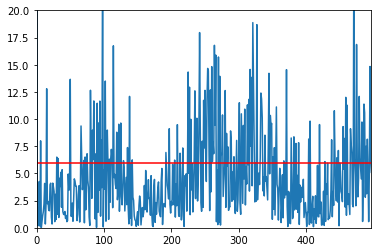

In [17]:
plot_NIS("./acc_0p05_yawacc_0p069.log")

### NIS plot when std_a_ = 0.5; std_yawdd_ = 0.69

% of points over chi-square 0.074297188755


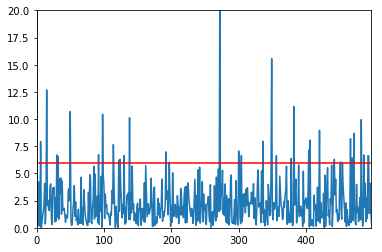

In [18]:
plot_NIS("./acc_0p5_yawacc_0p69.log")

### NIS plot when std_a_ = 0.6; std_yawdd_ = 0.75

% of points over chi-square 0.0722891566265


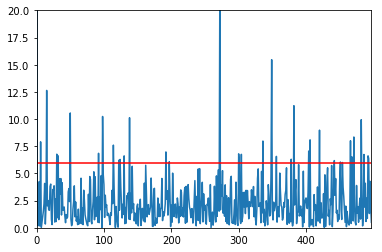

In [19]:
plot_NIS("./acc_0p6_yawacc_0p75.log")